# Electric guitar classifier

## Let's install dependencies

In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq duckduckgo_search

In [16]:
from duckduckgo_search import DDGS 
from fastcore.all import *

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [25]:
electric_guitar_urls = search_images('electric guitar', max_images=1)
electric_guitar_urls[0]

'https://c1.zzounds.com/media/productmedia/fit,2018by3200/quality,85/8_Full_Left_Front_NA-0ae3654f8ce0eb1c073d2da86b54e238.jpg'

## Download and display guitar images

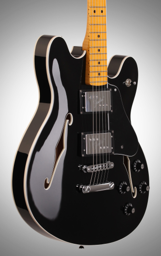

In [26]:
from fastdownload import download_url
from fastai.vision.all import *

electric_destination = 'electric_guitar.jpg'
download_url(electric_guitar_urls[0], electric_destination, show_progress=False)

image = Image.open(destination)
image.to_thumb(256, 256)

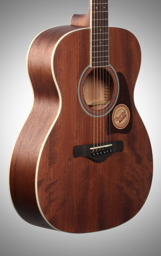

In [22]:
download_url(search_images('acoustic guitar', max_images=1)[0], 'acoustic_guitar.jpg', show_progress=False)
Image.open('acoustic_guitar.jpg').to_thumb(256, 256)

## Download images for training

In [ ]:
from time import sleep

guitar_types = 'electric guitar', 'classical guitar', 'acoustic guitar', 'ukulele'
path = Path('electric_guitar_or_not')

electric_destination = (path/'electric')
electric_destination.mkdir(exist_ok=True, parents=True)

other_destination = (path/'other')
other_destination.mkdir(exist_ok=True, parents=True)

for guitar_type in guitar_types:
    if (guitar_type == 'electric guitar'):
        destination = electric_destination
    else:
        destination = other_destination
    download_images(destination, urls=search_images(guitar_type))
    sleep(10)
    resize_images(destination, max_size=400, dest=destination)
    
    